In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [36]:
dataset = pd.read_csv('online_shoppers_intention.csv')
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [51]:
dataset = dataset.drop(['Month' ] , axis=1)

In [52]:
dataset.shape


(12330, 15)

In [53]:
dataset.isnull().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
Revenue                    0
dtype: int64

<Axes: xlabel='Administrative', ylabel='count'>

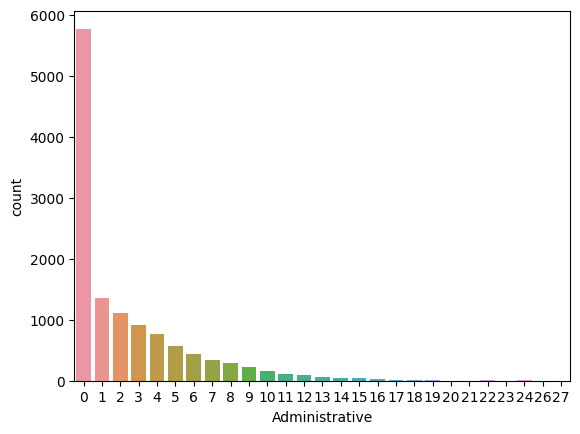

In [54]:
sns.countplot(x = 'Administrative', data=dataset)


In [55]:
X = dataset.iloc[:,0:-1]
y = dataset['Administrative']

In [56]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.79029289,
        -0.89417849, -0.76262903],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.20795193,
        -0.89417849, -0.51418219],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.79029289,
         2.43708134, -0.26573535],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.20795193,
        -0.89417849,  2.21873304],
       [ 0.50722805, -0.03291592, -0.3964779 , ..., -0.20795193,
        -0.06136354,  1.72183936],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.20795193,
        -0.89417849, -0.51418219]])

In [57]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))
     

In [58]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])
     

In [59]:
def fitnessFunction(kernel, C, gamma):
    svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return accuracy_score(y_pred, y_test)

In [60]:
for i in range(len(samples)):
    best_accuracy = 0
    best_C = 0
    best_gamma = 0
    for kernel in kernels:
        X_train, X_test, y_train, y_test = samples[i]
        C = np.random.uniform(0, 10)
        gamma = np.random.uniform(0, 10)
        score = fitnessFunction(kernel, C, gamma)
        if score>best_accuracy:
            best_accuracy = round(score, 2)
            best_C = round(C, 2)
            best_gamma = round(gamma, 2)
            best_kernel = kernel
    print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
    result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]
     

Best Accuracy =  0.64 Best Kernel =  linear Best Nu =  1.36 Best Epsilon =  0.16
Best Accuracy =  0.62 Best Kernel =  linear Best Nu =  0.45 Best Epsilon =  1.37
Best Accuracy =  0.7 Best Kernel =  linear Best Nu =  9.08 Best Epsilon =  8.58
Best Accuracy =  0.62 Best Kernel =  linear Best Nu =  2.31 Best Epsilon =  3.66
Best Accuracy =  0.64 Best Kernel =  linear Best Nu =  8.3 Best Epsilon =  0.92
Best Accuracy =  0.64 Best Kernel =  linear Best Nu =  9.25 Best Epsilon =  3.43
Best Accuracy =  0.61 Best Kernel =  linear Best Nu =  5.11 Best Epsilon =  7.37
Best Accuracy =  0.54 Best Kernel =  poly Best Nu =  6.95 Best Epsilon =  3.99
Best Accuracy =  0.61 Best Kernel =  linear Best Nu =  4.36 Best Epsilon =  5.71
Best Accuracy =  0.64 Best Kernel =  linear Best Nu =  9.77 Best Epsilon =  5.54


In [61]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.64,linear,1.36,0.16
1,2,0.62,linear,0.45,1.37
2,3,0.70,linear,9.08,8.58
3,4,0.62,linear,2.31,3.66
4,5,0.64,linear,8.30,0.92
5,6,0.64,linear,9.25,3.43
6,7,0.61,linear,5.11,7.37
7,8,0.54,poly,6.95,3.99
8,9,0.61,linear,4.36,5.71
9,10,0.64,linear,9.77,5.54


In [62]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]


In [63]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))
     

In [64]:
train_sizes


array([  77,  234,  391,  548,  705,  862, 1019, 1176, 1333, 1489, 1646,
       1803, 1960, 2117, 2274, 2431, 2588, 2745, 2902, 3059, 3216, 3373,
       3530, 3686, 3843, 4000, 4157, 4314, 4471, 4628, 4785, 4942, 5099,
       5256, 5413, 5570, 5726, 5883, 6040, 6197, 6354, 6511, 6668, 6825,
       6982, 7139, 7296, 7453, 7610, 7767])

In [65]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

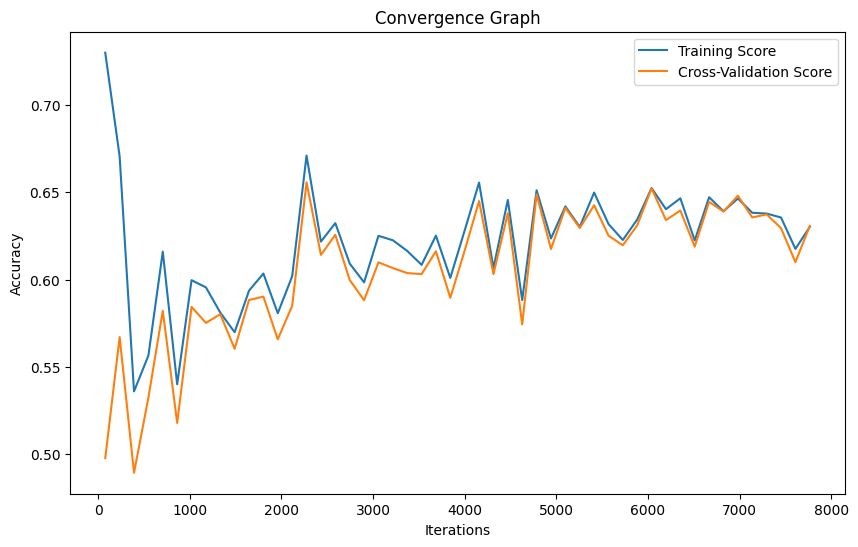

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()